In [4]:
import pandas as pd
df = pd.read_csv('nuclear-explosion-data.csv')
df.head()


,date,time,id,country,region,source,lat,long,mb,Ms,depth,yield_lower,yield_upper,purpose,name,type
0,19450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1,19450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
2,19450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
3,19460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
4,19460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW


In [5]:
df.index

RangeIndex(start=0, stop=2051, step=1)

In [6]:
df.columns

Index(['date', 'time', 'id', 'country', 'region', 'source', 'lat', 'long',
       'mb', 'Ms', 'depth', 'yield_lower', 'yield_upper', 'purpose', 'name',
       'type'],
      dtype='object')

In [10]:
from datetime import datetime
def parse_time(t):
    h, t = divmod(t, 10000)
    minutes, t = divmod(t, 100)
    return int(h), int(minutes), int(t)

In [11]:
def parse_datetime(date , time):
    date_and_time = datetime.strptime(str(date), '%Y%m%d')
    hour, minute, second = parse_time(time)
    return date_and_time.replace(hour=hour , minute=minute , second=second)

In [28]:
df['index'] = df.index = pd.DatetimeIndex([parse_datetime(date, time) for date, time in zip(df.loc[:,'date'], df.loc[:,'time'])])

In [17]:
df

,date,time,id,country,region,source,lat,long,mb,Ms,depth,yield_lower,yield_upper,purpose,name,type
1945-07-16 12:30:00,19450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1945-08-05 23:15:00,19450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
1945-08-09 01:58:00,19450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
1946-06-30 22:01:00,19460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
1946-07-24 21:35:00,19460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-07-29 01:48:59,19960729,14859.1,96003,CHINA,LOP NOR,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,WR,NaN,UG
1998-05-11 10:13:44,19980511,101344.0,98001,INDIA,POKHRAN,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,WR,SHAKTI 1-3,UG
1998-05-13 06:51:00,19980513,65100.0,98003,INDIA,POKHRAN,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,WR,NaN,UG
1998-05-28 10:16:17,19980528,101617.6,98004,PAKISTAN,CHAGAI,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,WR,NaN,UG


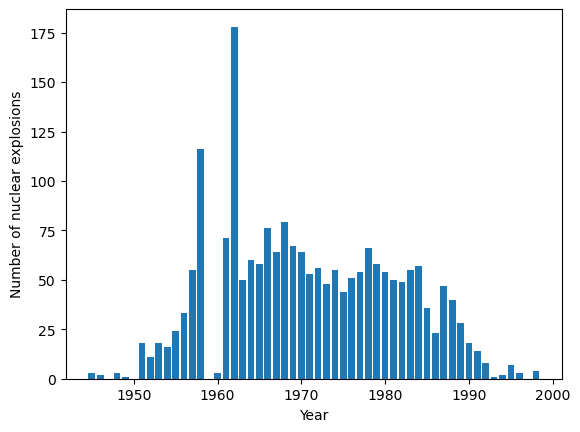

In [43]:

explosion_number = df.groupby(df.index.year).size()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(explosion_number.index, explosion_number.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of nuclear explosions')
plt.show()

In [38]:
df2 = df.groupby([df.index.year , df.country])
explosions_by_country = df2.size()
print(explosions_by_country.head(7))

      country
1945  USA         3
1946  USA         2
1948  USA         3
1949  USSR        1
1951  USA        16
      USSR        2
1952  UK          1
dtype: int64


In [39]:
explosions_by_country = explosions_by_country.unstack().fillna(0)
print(explosions_by_country.head(7))

country  CHINA  FRANCE  INDIA  PAKISTAN   UK   USA  USSR
1945       0.0     0.0    0.0       0.0  0.0   3.0   0.0
1946       0.0     0.0    0.0       0.0  0.0   2.0   0.0
1948       0.0     0.0    0.0       0.0  0.0   3.0   0.0
1949       0.0     0.0    0.0       0.0  0.0   0.0   1.0
1951       0.0     0.0    0.0       0.0  0.0  16.0   2.0
1952       0.0     0.0    0.0       0.0  1.0  10.0   0.0
1953       0.0     0.0    0.0       0.0  2.0  11.0   5.0


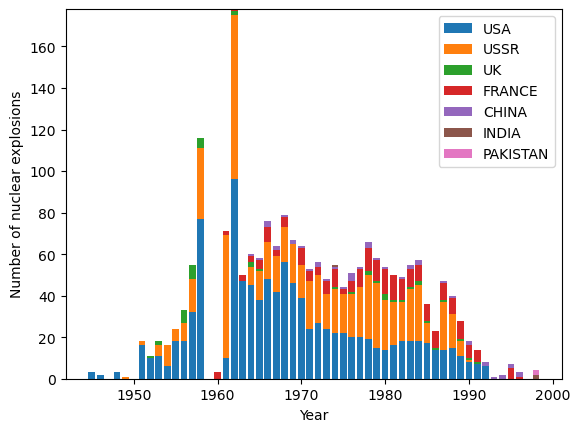

In [45]:
import numpy as np
countries = ['USA', 'USSR', 'UK', 'FRANCE', 'CHINA', 'INDIA', 'PAKISTAN']
bottom = np.zeros(len(explosions_by_country))
fig, ax = plt.subplots()
for country in countries:
    ax.bar(explosions_by_country.index , explosions_by_country[country],
    bottom=bottom , label=country)
    bottom += explosions_by_country[country].values
ax.set_xlabel('Year')
ax.set_ylabel('Number of nuclear explosions')
ax.legend()
plt.show()